## Description of dataset


**"I want to know, how likely a potential customer is to make a purchase It's very important in order to take actions at the right time and re-targeting campaigns that increase the organization's profit and optimize marketing spending.".**


---

Administrative: Number of administrative pages that the user has visited.

Administrative_Duration: Amount of time the user has spent on these types of pages.

Informational: Number of informational pages that the user has visited.

Informational_Duration: Amount of time the user has spent on this type of pages.

ProductRelated: Number of product pages that the user has visited.

ProductRelated_Duration: Amount of time the user has spent on these types of pages.

BounceRates: Percentage of visitors who enter the website through the page they landed on.

ExitRates: Percentage of page views that end on the page they landed on.

PageValues: Internal evaluation of the page.

SpecialDay: Proximity in time to a holiday.

Month: Month.

OperatingSystems: Operating system.

Browser: Browser.

Region: Region.

TrafficType: Traffic type.

VisitorType: Visitor type (New or returning).

Weekend: True/False if is weekend.

Revenue: True/False if the customer has made a purchase.







**Dataset download**

In [1]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pycaret

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.utils.generic import check_metric
import logging, sys
logging.disable(sys.maxsize)

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_test.csv")

In [5]:
train.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,False
2,2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
3,3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,True
4,4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [6]:
train.shape

(9248, 19)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9248 entries, 0 to 9247
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               9248 non-null   int64  
 1   Administrative           9248 non-null   int64  
 2   Administrative_Duration  9248 non-null   float64
 3   Informational            9248 non-null   int64  
 4   Informational_Duration   9248 non-null   float64
 5   ProductRelated           9248 non-null   int64  
 6   ProductRelated_Duration  9248 non-null   float64
 7   BounceRates              9248 non-null   float64
 8   ExitRates                9248 non-null   float64
 9   PageValues               9248 non-null   float64
 10  SpecialDay               9248 non-null   float64
 11  Month                    9248 non-null   object 
 12  OperatingSystems         9248 non-null   int64  
 13  Browser                  9248 non-null   int64  
 14  Region                  

In [8]:
train.isnull().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no null values.

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9248.0,4623.500000,2669.811978,0.0,2311.750000,4623.500000,6935.250000,9247.000000
Administrative,9248.0,2.317582,3.310542,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,9248.0,82.013092,178.249399,0.0,0.000000,8.000000,94.625000,3398.750000
Informational,9248.0,0.504650,1.260054,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,9248.0,35.032218,142.756676,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,9248.0,31.608997,44.415785,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,9248.0,1190.200830,1944.167809,0.0,185.000000,594.483333,1463.850000,63973.522230
BounceRates,9248.0,0.022405,0.048772,0.0,0.000000,0.003226,0.017143,0.200000
ExitRates,9248.0,0.043197,0.048798,0.0,0.014286,0.025254,0.050000,0.200000
PageValues,9248.0,5.846462,17.805098,0.0,0.000000,0.000000,0.000000,287.953793


In [10]:
train.drop_duplicates(inplace=True)
train.shape

(9248, 19)

Duplicated values have been removed.

In [11]:
train['Revenue'].replace([False], 0, inplace = True)
train['Revenue'].replace([True], 1, inplace = True)
train.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,0
1,1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,0
2,2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,0
3,3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,1
4,4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [12]:
train.set_index('Unnamed: 0', inplace = True)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,0
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,0
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,0
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,1
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [13]:
train.index.name = 'Indice'
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,0
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,0
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,0
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,1
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


The values in the column were replaced with the values 1 and 0. 1 if the person has made a purchase, 0 if the person has not made a purchase.

Now, we analyze the test data.

In [14]:
test.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [15]:
test.shape

(3082, 19)

In [16]:
test.set_index('Unnamed: 0', inplace = True)  
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [17]:
test.index.name = 'Index'
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Index,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 3081
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           3082 non-null   int64  
 1   Administrative_Duration  3082 non-null   float64
 2   Informational            3082 non-null   int64  
 3   Informational_Duration   3082 non-null   float64
 4   ProductRelated           3082 non-null   int64  
 5   ProductRelated_Duration  3082 non-null   float64
 6   BounceRates              3082 non-null   float64
 7   ExitRates                3082 non-null   float64
 8   PageValues               3082 non-null   float64
 9   SpecialDay               3082 non-null   float64
 10  Month                    3082 non-null   object 
 11  OperatingSystems         3082 non-null   int64  
 12  Browser                  3082 non-null   int64  
 13  Region                   3082 non-null   int64  
 14  TrafficType             

In [19]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,3082.0,2.307917,3.355821,0.0,0.000000,1.000000,4.000000,26.000000
Administrative_Duration,3082.0,77.234391,172.270712,0.0,0.000000,6.000000,90.000000,2407.423810
Informational,3082.0,0.500324,1.300201,0.0,0.000000,0.000000,0.000000,16.000000
Informational_Duration,3082.0,32.792575,134.554738,0.0,0.000000,0.000000,0.000000,2256.916667
ProductRelated,3082.0,32.098962,44.659427,0.0,7.000000,18.000000,38.000000,518.000000
ProductRelated_Duration,3082.0,1208.385339,1819.324856,0.0,180.750000,612.947917,1470.777083,23050.104140
BounceRates,3082.0,0.021550,0.047630,0.0,0.000000,0.002713,0.016643,0.200000
ExitRates,3082.0,0.042700,0.047994,0.0,0.014059,0.025000,0.050000,0.200000
PageValues,3082.0,6.017673,20.693205,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,3082.0,0.066191,0.207250,0.0,0.000000,0.000000,0.000000,1.000000


In [20]:
train['Revenue'].replace([False], 0, inplace = True)
train['Revenue'].replace([True], 1, inplace = True)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,0
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,0
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,0
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,1
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


In [21]:
clasificacion = setup(data = train, target = "Revenue", session_id=123)

,Description,Value
0,Session id,123
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(9248, 18)"
4,Transformed data shape,"(9248, 29)"
5,Transformed train set shape,"(6473, 29)"
6,Transformed test set shape,"(2775, 29)"
7,Numeric features,14
8,Categorical features,2
9,Preprocess,True


We compare the top 10 models.

In [22]:
best_model = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9025,0.9188,0.5709,0.7482,0.6472,0.5918,0.5994,0.1460
gbc,Gradient Boosting Classifier,0.8979,0.9264,0.5965,0.7072,0.6466,0.5874,0.5907,0.1210
lightgbm,Light Gradient Boosting Machine,0.8976,0.9206,0.5907,0.7084,0.6437,0.5845,0.5881,0.2590
et,Extra Trees Classifier,0.8917,0.9074,0.4516,0.7596,0.5655,0.5084,0.5313,0.1580
ada,Ada Boost Classifier,0.8888,0.9084,0.5551,0.6784,0.6095,0.5455,0.5499,0.1280
lr,Logistic Regression,0.8843,0.8851,0.3983,0.7452,0.5184,0.4595,0.4891,0.7400
lda,Linear Discriminant Analysis,0.8795,0.8958,0.3519,0.7427,0.4761,0.4181,0.4560,0.1150
ridge,Ridge Classifier,0.8738,0.0000,0.2671,0.7846,0.3968,0.3454,0.4091,0.1110
knn,K Neighbors Classifier,0.8542,0.7513,0.2603,0.5801,0.3585,0.2894,0.3195,0.3430
dt,Decision Tree Classifier,0.8464,0.7207,0.5375,0.5111,0.5231,0.4318,0.4325,0.1210


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

I chose to continue working with the 'gbc' model since it has a very good recall compared to the rest of the models. The model takes longer to execute but considering that we don't have a significantly large amount of data, it is acceptable.

In [23]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


**Model creation**

In [24]:
gbc = create_model('gbc') 
print(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9043,0.9358,0.6275,0.7273,0.6737,0.6180,0.6203
1,0.8966,0.9379,0.5882,0.7059,0.6417,0.5819,0.5852
2,0.9012,0.9096,0.6176,0.7159,0.6632,0.6057,0.6079
3,0.8887,0.9177,0.5842,0.6629,0.6211,0.5561,0.5577
4,0.9042,0.9347,0.5842,0.7468,0.6556,0.6009,0.6070
5,0.8980,0.9245,0.5941,0.7059,0.6452,0.5861,0.5891
6,0.8794,0.9201,0.5743,0.6237,0.5979,0.5272,0.5278
7,0.8980,0.9348,0.5842,0.7108,0.6413,0.5825,0.5863
8,0.8980,0.9075,0.5446,0.7333,0.6250,0.5675,0.5759


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Model optimization**


In [25]:
optimizar_gbc = tune_model(gbc)
print(optimizar_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9012,0.9243,0.6176,0.7159,0.6632,0.6057,0.6079
1,0.8935,0.9164,0.5784,0.6941,0.6310,0.5694,0.5726
2,0.8966,0.8900,0.6471,0.6804,0.6633,0.6023,0.6026
3,0.8779,0.9001,0.5644,0.6196,0.5907,0.5191,0.5199
4,0.9026,0.9066,0.6040,0.7262,0.6595,0.6032,0.6067
5,0.8964,0.9034,0.6139,0.6889,0.6492,0.5887,0.5901
6,0.8764,0.9003,0.5347,0.6207,0.5745,0.5026,0.5045
7,0.8995,0.9141,0.6040,0.7093,0.6524,0.5941,0.5968
8,0.8903,0.8962,0.4653,0.7344,0.5697,0.5104,0.5279


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Model evaluation**

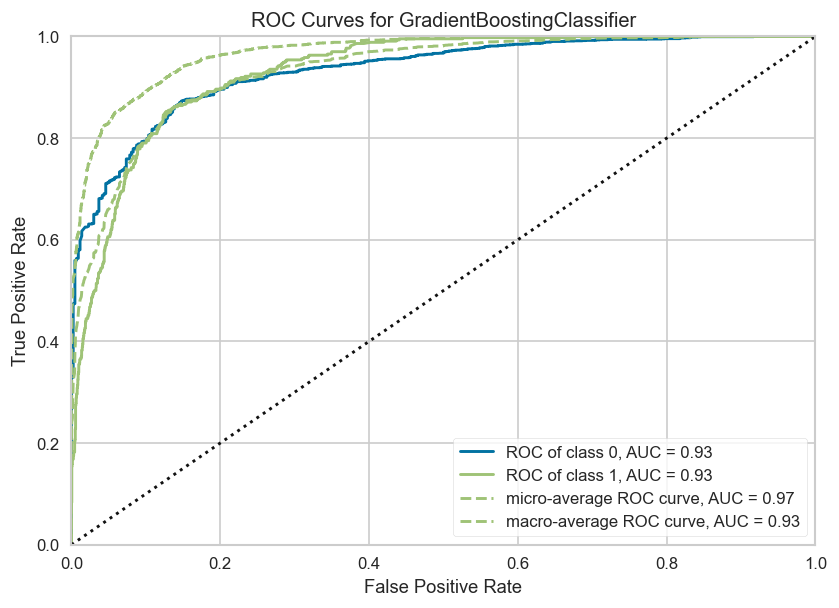

In [32]:
plot_model(optimizar_gbc, plot = 'auc', scale=1.2)

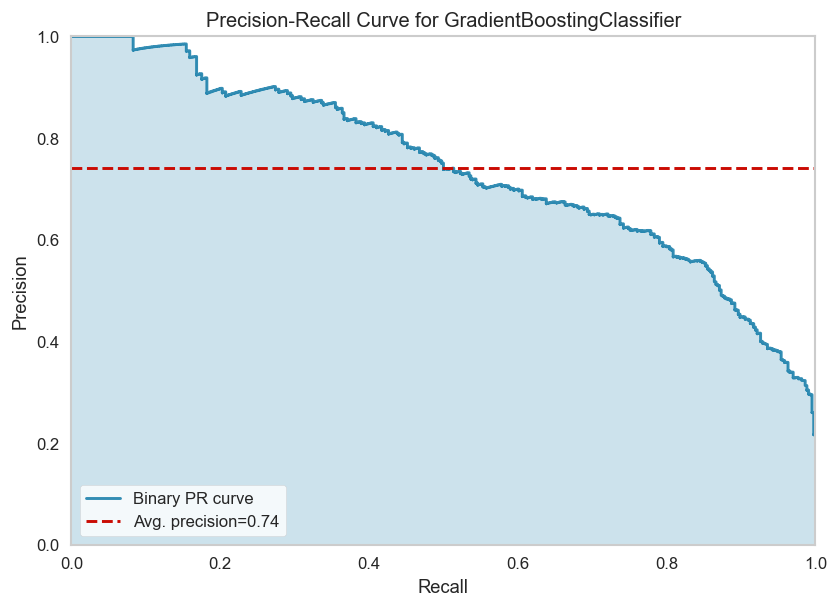

In [33]:
plot_model(optimizar_gbc, plot = 'pr', scale=1.2)

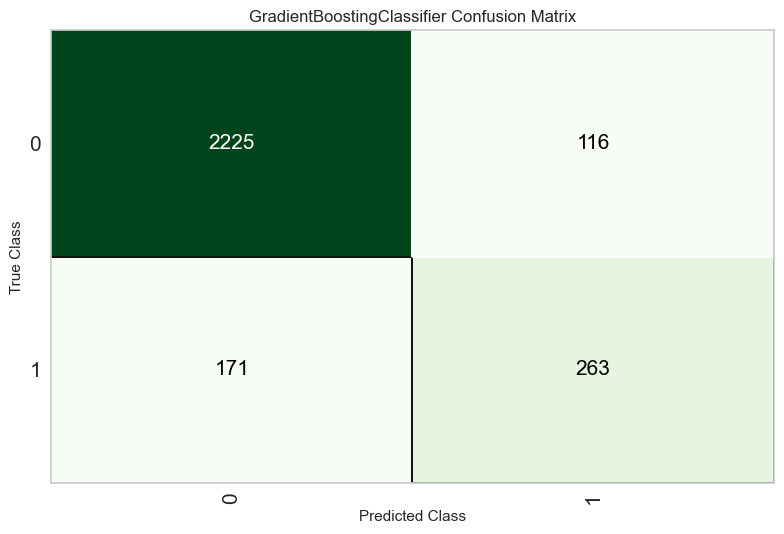

In [34]:
plot_model(optimizar_gbc, plot = 'confusion_matrix')

Prediction on test data

In [27]:
predict_model(optimizar_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8966,0.9322,0.6060,0.6939,0.6470,0.5867,0.5886


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,prediction_label,prediction_score
Indice,,,,,,,,,,,,,,,,,,,,
7879,8,492.416656,4,384.000000,52,4699.277832,0.007258,0.018233,11.107651,0.0,Mar,2,2,1,2,Returning_Visitor,False,1,1,0.5063
5397,0,0.000000,0,0.000000,19,337.166656,0.000000,0.003509,0.000000,1.0,May,1,1,9,3,Returning_Visitor,True,0,0,0.9894
4055,0,0.000000,0,0.000000,3,161.000000,0.000000,0.066667,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,0,0,0.9913
6822,4,153.250000,0,0.000000,19,402.716675,0.000000,0.003030,57.473999,0.0,May,2,2,5,4,New_Visitor,True,1,1,0.8946
8997,0,0.000000,0,0.000000,5,377.000000,0.000000,0.040000,0.000000,0.2,May,2,2,6,4,Returning_Visitor,False,0,0,0.9931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,1,68.599998,1,29.200001,97,4318.667969,0.002520,0.013784,0.000000,0.0,Jul,2,4,2,2,Returning_Visitor,True,0,0,0.9241
5217,1,0.000000,0,0.000000,1,28.000000,0.000000,0.100000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,0,0,0.9926
4461,0,0.000000,0,0.000000,29,1131.315430,0.021429,0.046071,0.000000,0.0,May,2,2,2,6,Returning_Visitor,True,0,0,0.9928


**Model finalization**

In [28]:
final_gbc = finalize_model(optimizar_gbc)
print(final_gbc)

Pipeline(memory=FastMemory(location=C:\Users\maria\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Administrative',
                                             'Administrative_Duration',
                                             'Informational',
                                             'Informational_Duration',
                                             'ProductRelated',
                                             'ProductRelated_Duration',
                                             'BounceRates', 'ExitRates',
                                             'PageValues', 'SpecialDay',
                                             'OperatingSystems', 'Brow...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_d

In [29]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9178,0.9554,0.6590,0.7814,0.7150,0.6674,0.6707


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,prediction_label,prediction_score
Indice,,,,,,,,,,,,,,,,,,,,
7879,8,492.416656,4,384.000000,52,4699.277832,0.007258,0.018233,11.107651,0.0,Mar,2,2,1,2,Returning_Visitor,False,1,0,0.5761
5397,0,0.000000,0,0.000000,19,337.166656,0.000000,0.003509,0.000000,1.0,May,1,1,9,3,Returning_Visitor,True,0,0,0.9915
4055,0,0.000000,0,0.000000,3,161.000000,0.000000,0.066667,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,0,0,0.9900
6822,4,153.250000,0,0.000000,19,402.716675,0.000000,0.003030,57.473999,0.0,May,2,2,5,4,New_Visitor,True,1,1,0.9145
8997,0,0.000000,0,0.000000,5,377.000000,0.000000,0.040000,0.000000,0.2,May,2,2,6,4,Returning_Visitor,False,0,0,0.9930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,1,68.599998,1,29.200001,97,4318.667969,0.002520,0.013784,0.000000,0.0,Jul,2,4,2,2,Returning_Visitor,True,0,0,0.9331
5217,1,0.000000,0,0.000000,1,28.000000,0.000000,0.100000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,0,0,0.9913
4461,0,0.000000,0,0.000000,29,1131.315430,0.021429,0.046071,0.000000,0.0,May,2,2,2,6,Returning_Visitor,True,0,0,0.9941


In [30]:
test = predict_model(final_gbc, data=test)
test.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9062,0.9328,0.6239,0.7122,0.6651,0.6109,0.6127


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,prediction_label,prediction_score
Index,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0.9885
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False,0,0.9836
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False,0,0.9807
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False,0,0.9716
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False,0,0.9807


**Evaluation of the prediction**

In [37]:
check_metric(test['Revenue'], test['prediction_label'], metric = 'Accuracy')

0.9062